In [3]:
import os, sys
import argparse

from sklearn.externals import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn import over_sampling, under_sampling
from hyperopt import Trials
import pickle as pkl
import numpy as np

import matplotlib.ticker as mtick

C:\Users\PAPAZ\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\PAPAZ\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PAPAZ\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is de

In [4]:
def getBestModelfromTrials(trials, order, STATUS_OK):
    valid_trial_list = [trial for trial in trials
                        if STATUS_OK == trial['result']['status']]
    losses = [ float(trial['result']['loss']) for trial in valid_trial_list]

    index_having_minumum_sort = np.argsort(losses)
    index_having_minumum_loss = index_having_minumum_sort[order-1]

    best_trial_obj = valid_trial_list[index_having_minumum_loss]
        
    return best_trial_obj['misc']['vals'], losses[index_having_minumum_loss]

In [140]:
trials = 25
ssize = 3000
model = 'SVM'
dataset = 'MCD12Q1v6stable01to15_LCProp2_major'

modeldir = r'E:\acocac\research\AMZ\models\3_comparison\{}_ssize{}_trials{}_trainon200120022003_{}'.format(model,ssize,trials,dataset)

trials = pkl.load(
    open(os.path.join(modeldir,'hpt','hyperopt_trials_niters{}_ssize{}.pkl'.format(trials,ssize)),
         'rb'))

In [93]:
STATUS_OK = 'ok'
valid_trial_list = [trial for trial in trials.trials
                if STATUS_OK == trial['result']['status']]
losses = [ float(trial['result']['loss']) for trial in valid_trial_list]

In [96]:
c_lim = (-2, 7)
g_lim = (-2, 4)

C_space = [10 ** exp for exp in range(*c_lim)]
gamma_space =  [10**exp for exp in range(*g_lim)]

In [102]:
C_space[8]

1000000

In [141]:
parameters = ['bootstrap', 'classifier_type', 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split','n_estimators']

for i in range(0,8):
    bm, l = getBestModelfromTrials(trials, i, STATUS_OK)
    print(i, bm, l)

0 {'C': [7], 'classifier_type': [0], 'gamma': [4], 'kernel': [0]} -0.13986666045037063
1 {'C': [2], 'classifier_type': [0], 'gamma': [2], 'kernel': [0]} -0.7410291078061136
2 {'C': [2], 'classifier_type': [0], 'gamma': [1], 'kernel': [0]} -0.7383250190374065
3 {'C': [2], 'classifier_type': [0], 'gamma': [1], 'kernel': [0]} -0.7383250190374065
4 {'C': [2], 'classifier_type': [0], 'gamma': [1], 'kernel': [0]} -0.7383250190374065
5 {'C': [8], 'classifier_type': [0], 'gamma': [2], 'kernel': [0]} -0.711672649851586
6 {'C': [8], 'classifier_type': [0], 'gamma': [2], 'kernel': [0]} -0.711672649851586
7 {'C': [1], 'classifier_type': [0], 'gamma': [2], 'kernel': [0]} -0.7080050351997761


In [34]:
bm_dir = r'E:\acocac\research\AMZ\models\3_comparison\SVM_ssize3000_trials25_trainon200120022003_MCD12Q1v6stable01to03_LCProp2_major\models'

for i in range(3):
    model = joblib.load(os.path.join(bm_dir, 'model-SVM_bm{}.h5'.format(i+1)))
    print(model)

Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, sampling_strategy='auto')),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=1))],
         verbose=False)
Pipeline(memory=None,
         steps=[('randomoversampler',
                 RandomOverSampler(random_state=42, sampling_strategy='auto')),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                   

In [12]:
ntrials = 100
ssize = 3000
model = 'RF'
datasets = ['MCD12Q1v6stable01to15_LCProp2_major']

Text(0.07, 0.5, 'Overall Accuracy (OA) [0 - 1]')

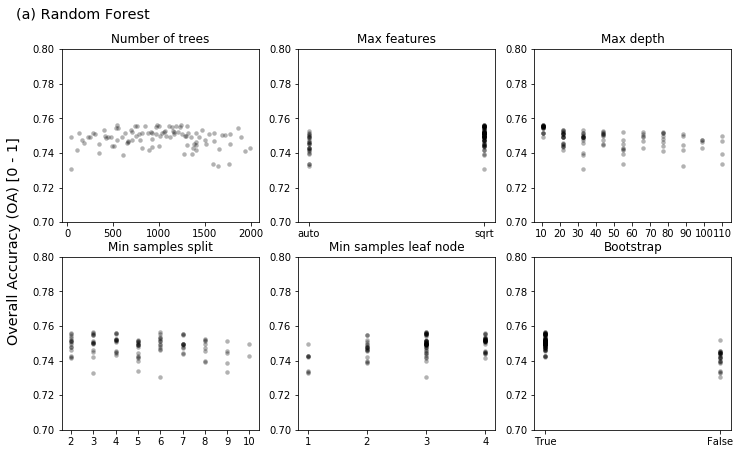

In [13]:
import matplotlib.pyplot as plt 

parameters = ['n_estimators', 'max_features', 'max_depth', 'min_samples_split',  'min_samples_leaf', 'bootstrap']
titles = ['Number of trees', 'Max features', 'Max depth', 'Min samples split', 'Min samples leaf node','Bootstrap']
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(12,7))
axes = ax.flatten()

cmap = plt.cm.jet
for i, val in enumerate(parameters):
    for d in datasets:
        modeldir = r'E:\acocac\research\AMZ\models\3_comparison\{}_ssize{}_trials{}_trainon200120022003_{}'.format(model,ssize,ntrials,d)
        trials = pkl.load(
        open(os.path.join(modeldir,'hpt','hyperopt_trials_niters{}_ssize{}.pkl'.format(ntrials,ssize)),
             'rb'))

        xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
        ys = [-t['result']['loss'] for t in trials.trials]
        xs, ys = zip(*sorted(zip(xs, ys)))
        ys = np.array(ys)
        
        if d == 'MCD12Q1v6stable01to03_LCProp2_major':
            col = 'red'
        elif d == 'MCD12Q1v6stable01to15_LCProp2_major':
            col = 'black'
            
        axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.3, c=col)
        axes[i].set_title(titles[i])
        axes[i].set_ylim([0.7,0.8])

        if val == 'n_estimators':
            axes[i].xaxis.set_ticks(np.arange(0, 2001, 500))   
        elif val == 'bootstrap':
            l = [0,1]
            x = ['True', 'False']
            axes[i].set_xticks(l)
            axes[i].set_xticklabels(x)
        elif val == 'max_features':
            l = [0,1]
            x = ['auto', 'sqrt']
            axes[i].set_xticks(l)
            axes[i].set_xticklabels(x)
        elif val == 'max_depth':
            axes[i].xaxis.set_ticks(np.arange(10, 111, 10))   
        elif val == 'min_samples_split':
            axes[i].xaxis.set_ticks(np.arange(2, 11, 1))
        elif val == 'min_samples_split':
            axes[i].xaxis.set_ticks(np.arange(2, 11, 1))    

f.text(0.15,0.95, '(a) Random Forest', ha='center', va='center', size='x-large')
f.text(0.07,0.5, 'Overall Accuracy (OA) [0 - 1]', ha='center', va='center', rotation='vertical', size='x-large')

In [14]:
ntrials = 25
ssize = 3000
model = 'SVM'
datasets = ['MCD12Q1v6stable01to15_LCProp2_major']

Text(0.07, 0.5, 'Overall Accuracy (OA) [0 - 1]')

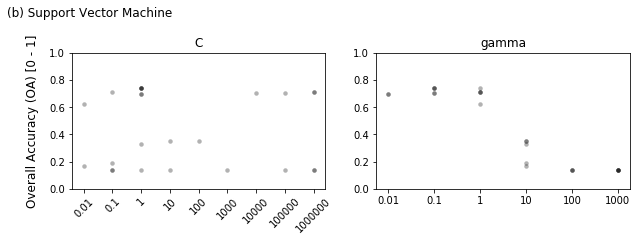

In [18]:
c_lim = (-2, 7)
g_lim = (-2, 4)

C_space = [10 ** exp for exp in range(*c_lim)]
gamma_space =  [10**exp for exp in range(*g_lim)]

parameters = ['C', 'gamma']
cols = len(parameters)
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,2.5))
axes = ax.flatten()
for i, val in enumerate(parameters):
    for d in datasets:
        modeldir = r'E:\acocac\research\AMZ\models\3_comparison\{}_ssize{}_trials{}_trainon200120022003_{}'.format(model,ssize,ntrials,d)
        trials = pkl.load(
        open(os.path.join(modeldir,'hpt','hyperopt_trials_niters{}_ssize{}.pkl'.format(ntrials,ssize)),
             'rb'))

        xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
        ys = [-t['result']['loss'] for t in trials.trials]
        xs, ys = zip(*sorted(zip(xs, ys)))
        ys = np.array(ys)

        if d == 'MCD12Q1v6stable01to03_LCProp2_major':
            col = 'red'
        elif d == 'MCD12Q1v6stable01to15_LCProp2_major':
            col = 'black'

        axes[i].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.3, c=col)
        axes[i].set_title(val)
        axes[i].set_ylim([0,1])
        
        if val == 'C':
            l = range(0,9)
            x = C_space
            axes[i].set_xticks(l)
            axes[i].set_xticklabels(x)
#             axes[i].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
            for tick in axes[i].get_xticklabels():
                tick.set_rotation(45)
        elif val == 'gamma':
            l = range(0,6)
            x = gamma_space
            axes[i].set_xticks(l)
            axes[i].set_xticklabels(x)
            
f.text(0.15,1.10, '(b) Support Vector Machine', ha='center', va='center', size='large')
f.text(0.07,0.5, 'Overall Accuracy (OA) [0 - 1]', ha='center', va='center', rotation='vertical', size='large')

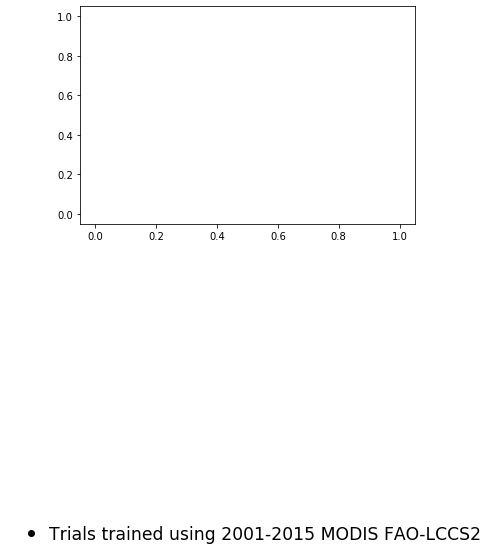

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import os

colors = ['black']
labels = ['Trials trained using 2001-2015 MODIS FAO-LCCS2']

f = lambda m,c: plt.plot([],[],marker='o', color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(colors))]
# legend = plt.legend(handles, labels, loc=5, framealpha=1, frameon=False)
legend = plt.legend(bbox_to_anchor=(0.5, -1.5), handletextpad=0.001, frameon=False, loc='lower center', borderaxespad=0., labels = labels, ncol=4, fontsize='xx-large')

def export_legend(legend, filename=os.path.join(r'E:\acocac\research\AMZ\img\legend_hyperopt.png'), expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()